In [ ]:
%cd /content/drive/MyDrive/'Project Final'/
%ls
#cd /drive/
#cd /drive/MyDrive/

/content/drive/MyDrive/Project Final
 dataset_query.py                                    Earnings-Calls-NLP-main.zip
 dl-7643-finalproj-DatasetCuration-main/             earnings_data.pkl
 dl-7643-finalproj-DatasetCuration-main2/            main2.ipynb
 dl-7643-finalproj-DatasetCuration-main2.zip         Model/
 dl-7643-finalproj-DatasetCuration-main.zip          models/
'dl-7643-finalproj-DatasetCuration\transcripts.db'   Updated_Project_code.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from fastai.text.all import *

# Download and prepare the IMDb movie review dataset
#path = untar_data(URLs.IMDB)
#dls = TextDataLoaders.from_folder(path, valid='test')

In [ ]:
import re

def preprocess_text(text):
    # Remove extra whitespaces and normalize spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing whitespaces
    text = text#.strip()
    return text


def dataset_parser_QandA(text):
    QandA_start_str = "Question-and-Answer Session"

    # Preprocess the text
    text = preprocess_text(text)

    # Find the start index of "Question-and-Answer Session"
    start_index = text.find(QandA_start_str)
    indicator = 1

    if start_index != -1:
        start_index += len(QandA_start_str)
    else:
        QandA_start_str = "Answer Session"
        start_index = text.find(QandA_start_str)
        if start_index == -1:
            indicator = 0
        else:
            start_index +=  len(QandA_start_str)

    # If start index is found, extract the text from that point onwards
    if start_index != -1:
        parsed_text = text[start_index:].strip()  # Remove leading and trailing whitespaces
    else:
        parsed_text = text.strip()  # Remove leading and trailing whitespaces

    return parsed_text, indicator


In [ ]:
import sqlite3
import pandas as pd

directory = "dl-7643-finalproj-DatasetCuration-main/dl-7643-finalproj-DatasetCuration-main/"
conn = sqlite3.connect(directory+'transcripts.db')
cursor = conn.cursor()

# Fetch column names
cursor.execute('PRAGMA table_info(transcripts)')
columns = cursor.fetchall()
column_names = [col[1] for col in columns]

# Fetch data
cursor.execute('SELECT * FROM transcripts')
data = cursor.fetchall()

# Create DataFrame with column names
earnings_data = pd.DataFrame(data, columns=column_names)

conn.close()

#print(df.head())  # Display the first few rows of the DataFrame
#earnings_data['date'] = pd.to_datetime(earnings_data[['report_year', 'report_month', 'report_day']])
earnings_data['Year'] = earnings_data['report_year'].astype(int)
earnings_data['Month'] = earnings_data['report_month'].astype(int)
earnings_data['Day'] = earnings_data['report_day'].astype(int)

# Convert to datetime
#earnings_data['date'] = pd.to_datetime(earnings_data[['report_year', 'report_month', 'report_day']])
earnings_data['date'] = pd.to_datetime(earnings_data[['Year', 'Month', 'Day']])
earnings_data['parsed_text'] = earnings_data['text_original'].apply(dataset_parser_QandA)

#earnings_data['parsed_text_identifier'] = earnings_data['text_original'].apply(dataset_parser_QandA2)


a, b = zip(*earnings_data['text_original'].apply(dataset_parser_QandA))


missing_values = earnings_data.isnull().sum()
#print("Missing Values:")
#print(missing_values)

# Check unique values in 'report_year', 'report_month', and 'report_day' columns
print("\nUnique values in 'report_year':", earnings_data['report_year'].unique())
print("Unique values in 'report_month':", earnings_data['report_month'].unique())
print("Unique values in 'report_day':", earnings_data['report_day'].unique())

#earnings_data['date'] = pd.to_datetime(earnings_data[['report_year', 'report_month', 'report_day']], format='%Y-%m-%d')

#earnings_data.head()
#print(earnings_data['text_original'][0])
#print(earnings_data['parsed_text'][0])


Unique values in 'report_year': [2023 2024 2022]
Unique values in 'report_month': [ 4  7 10  1  2 12  3  6  9  5  8 11]
Unique values in 'report_day': [25 24 23 27 26 30 19 20 18  2 21 22 28 14 15 13  1 31  5  4  3  9  7  8
 16  6 17 12 29 11 10]


In [ ]:
#a,b
earnings_data['parsed_text_identifier'] = a
earnings_data['parsed_indicator'] = b

print(earnings_data.shape)
print(earnings_data['parsed_text_identifier'][:5])
#print(b.shape)

(1570, 28)
0    Operator [Operator Instructions] Our first que...
1    Operator [Operator Instructions] Our first que...
2    Operator [Operator Instructions] Our first que...
3    Operator [Operator Instructions] And our first...
4    Operator Thank you. [Operator Instructions] Ou...
Name: parsed_text_identifier, dtype: object


In [ ]:
#earnings_data.to_pickle('earnings_data.pkl')
import sqlite3
import pandas as pd
earnings_data = pd.read_pickle('earnings_data.pkl')

In [ ]:
#print(earnings_data['parsed_text'][100])#[:100])
len(earnings_data[earnings_data['parsed_indicator'] ==0])

59

Total count of unique stocks: 408
Number of companies with a specific number of rows:
1      1
2     10
3     39
4    358
Name: count, dtype: int64
Summary of earnings_data:
             index      quarter         year  report_year  report_month  \
count  1570.000000  1570.000000  1570.000000  1570.000000   1570.000000   
mean    784.500000     2.486624  2023.101911  2023.229936      6.123567   
min       0.000000     1.000000  2022.000000  2022.000000      1.000000   
25%     392.250000     1.250000  2023.000000  2023.000000      4.000000   
50%     784.500000     2.000000  2023.000000  2023.000000      7.000000   
75%    1176.750000     3.000000  2023.000000  2023.000000     10.000000   
max    1569.000000     4.000000  2024.000000  2024.000000     12.000000   
std     453.364276     1.111450     0.344023     0.432870      3.328999   

        report_day  share_price_t_plus_2  share_price_t_minus_90  \
count  1570.000000           1570.000000             1570.000000   
mean     15.85

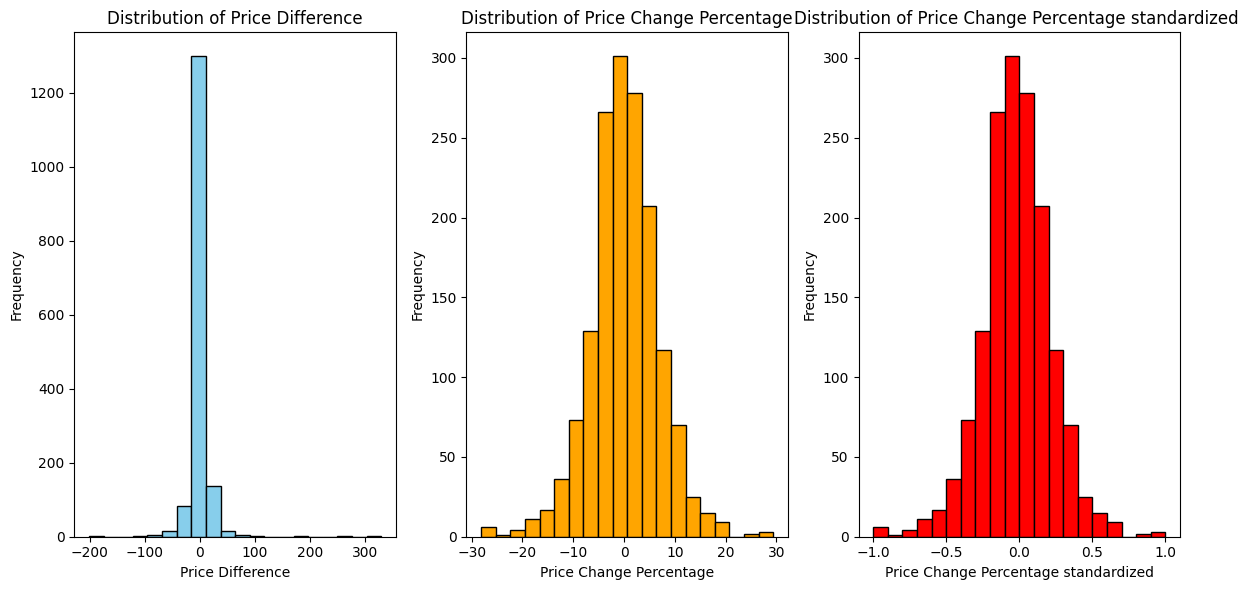

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

summary = earnings_data.describe()
total_stock_count = earnings_data['ticker'].nunique()
print("Total count of unique stocks:", total_stock_count)

company_row_counts = earnings_data.groupby('ticker').size().value_counts().sort_index()

# Display the counts
print("Number of companies with a specific number of rows:")
print(company_row_counts)

print("Summary of earnings_data:")
print(summary)

earnings_data['price_difference'] = earnings_data['share_price_t_plus_2'] - earnings_data['share_price_t_minus_2']
earnings_data['price_change_percentage'] = ((earnings_data['share_price_t_plus_2'] - earnings_data['share_price_t_minus_2']) / earnings_data['share_price_t_minus_2']) * 100

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Standardize 'price_difference' column and store in new column 'price_difference_standardized'
earnings_data['price_difference_standardized'] = scaler.fit_transform(earnings_data[['price_difference']])

# Standardize 'price_change_percentage' column and store in new column 'price_change_percentage_standardized'
earnings_data['price_change_percentage_standardized'] = scaler.fit_transform(earnings_data[['price_change_percentage']])


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(earnings_data['price_difference'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(earnings_data['price_change_percentage'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Price Change Percentage')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(earnings_data['price_change_percentage_standardized'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Price Change Percentage standardized ')
plt.xlabel('Price Change Percentage standardized')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

#### Going to pre process data and analyze further. I will pick up stocks only that has 4 quarter data as displayed above

In [ ]:

std_dev = earnings_data['price_change_percentage'].std()
mean = earnings_data['price_change_percentage'].mean()
print(std_dev)
print(mean)
# function to assign labels to each price change percentage category
def categorize_price_change(price_change_percentage, std_dev):
    if price_change_percentage < -3: #> 2 * std_dev:
        return 0
    elif  price_change_percentage > 3:
        return 1
    else:
        return 2

def categorize_price_change2(price_change_percentage, std_dev):
    if price_change_percentage > 7:
        return 1#'greater_than_7'
    elif 3 < price_change_percentage <= 7:
        return 2 #'7_to_3'
    elif -3 <= price_change_percentage <= 3:
        return 3 #'-3_to_3'
    elif -7 <= price_change_percentage < -3:
        return 4 #'-7_to_-3'
    else:
        return 5 #'less_than_-3'


#
earnings_data['price_change_category_3'] = earnings_data['price_change_percentage'].apply(lambda x: categorize_price_change(x, std_dev))
earnings_data['price_change_category_5'] = earnings_data['price_change_percentage'].apply(lambda x: categorize_price_change2(x, std_dev))
#earnings_data['price_change_category'] = earnings_data['price_change_category']
category_counts = earnings_data['price_change_category_5'].value_counts()
print(category_counts)

category_counts = earnings_data['price_change_category_3'].value_counts()
print(category_counts)


6.743844486254846
0.16022288932602377
price_change_category_5
3    634
2    269
4    266
1    216
5    185
Name: count, dtype: int64
price_change_category_3
2    634
1    485
0    451
Name: count, dtype: int64


In [ ]:
max_segment_length = 100

# Function to break down text into smaller segments
def break_text(text, max_length):
    segments = []
    #for i in range(1000, 5000, max_length):
    #for i in range(1000, 5000):
    #segments.append(text[1:100])
    return text[1:100]

# Apply the function to break down the 'text_original' column into smaller segments
earnings_data['text_segments'] = earnings_data['parsed_text_identifier'].apply(lambda x: break_text(x, max_segment_length))
earnings_data['text_segments'][1]

'perator [Operator Instructions] Our first question comes from the line of Andrew Obin with Bank of '

In [ ]:
#earnings_data['text_original']
filtered_df = earnings_data[['text_original','parsed_text_identifier','text_segments', 'ticker', 'price_change_category_3','parsed_indicator']]

**ULMFIT MODEL**

In [ ]:
#filtered_df = filtered_df[filtered_df['parsed_indicator']!=0]
#['parsed_indicator'] ==0]

In [ ]:
#filtered_df
#filtered_df[filtered_df['parsed_indicator']!=0]

In [ ]:
df = pd.DataFrame({'label':filtered_df.price_change_category_3, 'text':filtered_df.text_original})

In [ ]:
#df

In [ ]:


# Data Pre processing
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")
# removing stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# tokenization
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# detokenization
detokenized_doc = []
for i in range(len(df)):
    #print(i)
    #print(tokenized_doc[i])
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['text'] = detokenized_doc
## splitting data into train and validation datasets
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_train, df_val = train_test_split(df, stratify = df['label'], test_size = 0.2, random_state = 12)

#df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=12)
#df_train, df_val = train_test_split(df_train_val, stratify=df_train_val['label'], test_size=0.5, random_state=12)


df_train.shape, df_val.shape


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


((1256, 2), (314, 2))

In [ ]:
#!pip install fastai2
#!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
#df_trn.head()

#rom fastai2.text.all import *
print(df_train.index)
print(df['text'][1446])

#df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=12)
#df_train, df_val = train_test_split(df_train_val, stratify=df_train_val['label'], test_size=0.5, random_state=12)


Index([1446,  921,  391,  545, 1182, 1064,  330,  854,  871,  681,
       ...
         34,  511,   84,  521,  830,  680, 1174,  788, 1314, 1086],
      dtype='int64', length=1256)
Tyler Technologies, Inc. (TYL) Q3 2023 Earnings Call Transcript | Seeking AlphaSkip contentExplore Alpha PicksUpgrade To PROHomeAnalysisNewsMarket DataInvesting GroupsExplore Investing GroupsPortfoliosFind & CompareTop StocksTop ETFsStock ScreenerETF ScreenerComparisonsExplore Alpha PicksUpgrade To PROEntering text input field update search result belowSearch Symbols, analysts, keywordsGive feedbackNotificationsNo usernameSet UsernameInboxAccount SettingsManage Emails & AlertsSaved ArticlesRead ArticlesMy NotesWrite ArticleSign outTranscripts5Tyler Technologies, Inc. (TYL) Q3 2023 Earnings Call TranscriptNov. 02, 2023 12:43 PM ETTyler Technologies, Inc. (TYL) StockSA Transcripts145.58K FollowersFollowPlay Earnings CallTyler Technologies, Inc. (NYSE:TYL) Q3 2023 Earnings Conference Call November 2, 2023 10:00 

In [ ]:
import fastai
from fastai import *
from fastai.text import *
from fastai.text.all import *

batch_size = 64
seq_len = 72


In [ ]:
from fastai.text import *
df_train['is_valid'] = 0
df_val['is_valid'] = 1
df_combine = pd.concat([df_train, df_val], axis=0)

In [ ]:
df_combine
df_combine['transcript_id'] = range(len(df_combine))

# Define the maximum chunk size
max_chunk_size = 2000
chunk_dfs = []

# Iterate over each row in the DataFrame
for idx, row in df_combine.iterrows():
    text = row['text']
    transcript_id = row['transcript_id']
    label = row['label']
    is_valid = row['is_valid']

    # Calculate the number of chunks needed for the text
    num_chunks = int(np.ceil(len(text) / max_chunk_size))

    # Split the text into chunks
    text_chunks = [text[i:i+max_chunk_size] for i in range(0, len(text), max_chunk_size)]

    # Create a DataFrame for each chunk and append to chunk_dfs
    for i, chunk in enumerate(text_chunks):
        chunk_dfs.append(pd.DataFrame({'transcript_id': [transcript_id],#*len(chunk),
                                       'label': [label],#*len(chunk),
                                       'text': [chunk],
                                       'is_valid': [is_valid]#*len(chunk)
                                       }))


df_chunked = pd.concat(chunk_dfs, ignore_index=True)

# Now df_chunked contains the DataFrame with text column broken into smaller chunks
len(df_chunked)
#df_chunked


32499

In [ ]:
chunks_per_transcript = df_chunked.groupby('transcript_id').size().reset_index(name='num_chunks')
chunks_per_transcript

,transcript_id,num_chunks
0,0,20
1,1,20
2,2,24
3,3,21
4,4,21
...,...,...
1565,1565,22
1566,1566,11
1567,1567,1
1568,1568,24


In [ ]:
#dls_lm.show_batch(show = True)
class_lm = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=156, is_lm=True), CategoryBlock),
    get_x=ColReader('text'), get_y=ColReader('label'),
    splitter=ColSplitter())


dls = class_lm.dataloaders(df_combine, bs=64)


In [ ]:
#dls.show_batch()

In [ ]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 156]), torch.Size([64, 156]))

In [ ]:
tokens, classes = dls.vocab
tokens[:5], classes

(['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld'], [0, 1, 2])

In [ ]:
nums = xb[0][10:15].cuda()
nums

LMTensorText([12619,   221,     7,   233,    49], device='cuda:0')

In [ ]:
xb[-1].cuda(), len(xb[-1])

(LMTensorText([    8,   754,     9,     8,   754, 10572,     8,    76,     9,
                   8,    49,    10,     8,  1037,     9,     8,    49,    22,
                   9,     8,   436,    48,  4060,     8,  1606,    14,  7326,
                1744,     7,  3806,    10,   179,    10,    12,    33,   142,
                 103,  8116,   213,    10,  3394,   160,    10,     8,  3065,
                 125,   342,    10,  1271,   124,  5248,   726,   155,    47,
                4108,   164,   401,  1007,  4731,     9,     8,   436,    79,
                3587,   501,    10,  1990,   334,  1205,  1139,  1215,  1585,
                 994,    29, 27526,     8,  4060,   200,   927,    10,     7,
                3806,    10,  1705,   934,     9,     8,    35,   232,  1432,
                  10,     8,  4060,   479,     0,   124,  3550,   952,   902,
                   9,     8,   248,    48,     8,  4060,     7,  4002,  1495,
                 484,    10,     7,   414,   213,    12,    33, 

In [ ]:
learn = language_model_learner(
    dls, AWD_LSTM, drop_mult=0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
learn.fit_one_cycle(30, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.289642,4.178019,0.346108,65.236496,07:09
1,3.933898,3.887167,0.367557,48.772495,07:09
2,3.800477,3.783353,0.375158,43.963219,07:06
3,3.754710,3.752876,0.377866,42.643562,07:03
4,3.723280,3.758627,0.377090,42.889507,07:03
5,3.728305,3.772432,0.377586,43.485687,07:03
6,3.747198,3.781586,0.376997,43.885574,07:04
7,3.704076,3.762036,0.378801,43.035961,07:05
8,3.658219,3.758173,0.380654,42.870041,07:09
9,3.642448,3.747427,0.380861,42.411827,07:04


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.289642,4.178019,0.346108,65.236496,07:09
1,3.933898,3.887167,0.367557,48.772495,07:09
2,3.800477,3.783353,0.375158,43.963219,07:06
3,3.754710,3.752876,0.377866,42.643562,07:03
4,3.723280,3.758627,0.377090,42.889507,07:03
5,3.728305,3.772432,0.377586,43.485687,07:03
6,3.747198,3.781586,0.376997,43.885574,07:04
7,3.704076,3.762036,0.378801,43.035961,07:05
8,3.658219,3.758173,0.380654,42.870041,07:09
9,3.642448,3.747427,0.380861,42.411827,07:04


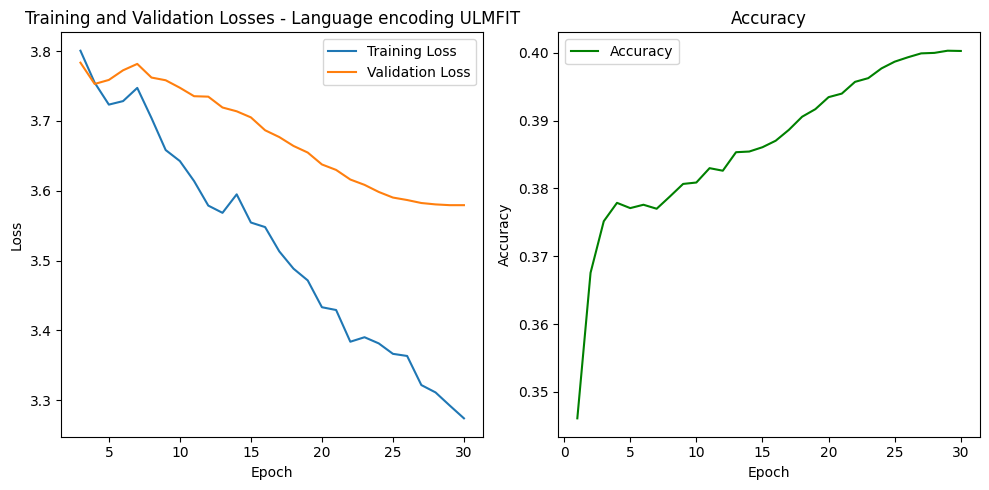

In [ ]:
#learn2.recorder.values

import matplotlib.pyplot as plt

# training loss, validation loss, and accuracy
train_losses_LM = [value[0] for value in learn.recorder.values]
val_losses_LM = [value[1] for value in learn.recorder.values]
accuracies_LM = [value[2] for value in learn.recorder.values]

# Plotting
epochs = range(1, len(train_losses_LM) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(epochs[2:], train_losses_LM[2:], label='Training Loss')
plt.plot(epochs[2:], val_losses_LM[2:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses - Language encoding ULMFIT')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies_LM, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
learn.save('30epoch')

Path('models/30epoch.pth')

In [ ]:
learn = learn.load('30epoch')

In [ ]:
learn.save_encoder('finetuned_30')

In [ ]:
#dls_lm.show_batch(show = True)
c = DataBlock(
    blocks=(TextBlock.from_df(text_cols = 'text', seq_len=156, vocab=dls.vocab[0]), CategoryBlock),
    get_x=ColReader('text'), get_y=ColReader('label'),
    splitter=ColSplitter())

dls_class = c.dataloaders(df_combine, bs=64)
dls_class.show_batch(max_n=2)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,text,category
0,"xxbos xxmaj palo xxmaj alto xxmaj networks , xxmaj inc . ( panw ) xxup q4 2023 xxmaj earnings xxmaj call xxmaj transcript | xxmaj seeking alphaskip contentexplore xxmaj alpha picksupgrade xxmaj to prohomeanalysisnewsmarket datainvesting groupsexplore xxmaj investing groupsportfolioscreate portfolioabout portfoliofind & comparetop stockstop etfsstock screeneretf screenercomparisonsexplore xxmaj alpha picksupgrade xxmaj to proentering text input field update search result belowsearch xxmaj symbols , analysts , keywordsgive feedbacknotificationsevandaykininboxprofileaccount settingsmanage xxmaj emails & alertssaved articlesread articlesmy noteswrite articlesign outtranscriptspalo xxmaj alto xxmaj networks , xxmaj inc . ( panw ) xxup q4 2023 xxmaj earnings xxmaj call transcriptaug . 18 , 2023 11:34 xxup pm etpalo xxmaj alto xxmaj networks , xxmaj inc . ( panw ) stocksa transcripts145.58k followersfollow5sharesavecommentsplay xxmaj earnings callpalo xxmaj alto xxmaj networks , xxmaj inc . ( nasdaq : panw ) xxup q4 2023 xxmaj earnings xxmaj conference xxmaj call xxmaj august 18 , 2023 4:30 xxup",1
1,"xxbos xxmaj equifax xxmaj inc . ( efx ) xxup q2 2023 xxmaj earnings xxmaj call xxmaj transcript | xxmaj seeking alphaskip contentexplore xxmaj alpha picksupgrade xxmaj to prohomeanalysisnewsmarket datainvesting groupsexplore xxmaj investing groupsportfolioscreate portfolioabout portfoliofind & comparetop stockstop etfsstock screeneretf screenercomparisonsexplore xxmaj alpha picksupgrade xxmaj to proentering text input field update search result belowsearch xxmaj symbols , analysts , keywordsgive feedbacknotificationsevandaykininboxprofileaccount settingsmanage xxmaj emails & alertssaved articlesread articlesmy noteswrite articlesign outtranscriptsequifax xxmaj inc . ( efx ) xxup q2 2023 xxmaj earnings xxmaj call transcriptjul . 20 , 2023 xxunk xxup pm etequifax xxmaj inc . ( efx ) stocksa transcripts145.58k followersfollow5sharesavecommentsplay xxmaj earnings callequifax xxmaj inc . ( nyse : efx ) xxup q2 2023 xxmaj earnings xxmaj conference xxmaj call xxmaj july 20 , 2023 8:30 xxup am xxup et xxmaj company xxmaj participants xxmaj mark xxmaj begor - xxmaj chief xxmaj executive xxmaj officer xxmaj john",0


In [ ]:
learn2 = text_classifier_learner(dls_class, AWD_LSTM, drop_mult=0.3,
                                metrics=accuracy).to_fp16()

learn2 = learn2.load_encoder('finetuned_30')


In [ ]:
learn2.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.150709,1.108235,0.359873,00:30


SuggestedLRs(valley=0.001737800776027143)

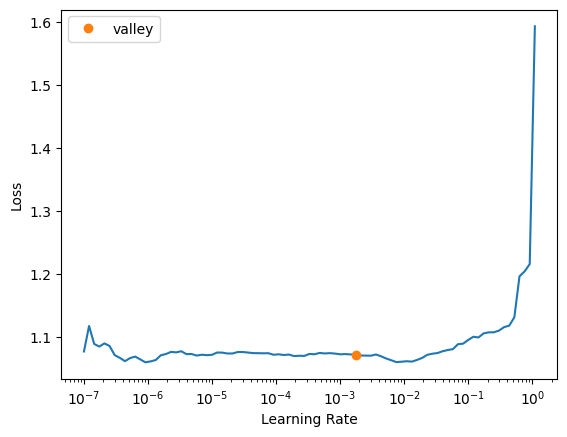

In [ ]:
learn2.freeze_to(-2)
learn2.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.068228,1.117464,0.369427,00:35
1,1.060315,1.157825,0.382166,00:35
2,1.044596,1.149691,0.404459,00:35
3,1.024607,1.271824,0.420382,00:35
4,0.989759,1.371514,0.334395,00:35
5,0.939739,1.924008,0.429936,00:35
6,0.858412,2.950492,0.280255,00:35
7,0.740999,3.433444,0.394904,00:35
8,0.601879,4.353137,0.394904,00:35
9,0.458533,4.745093,0.289809,00:35


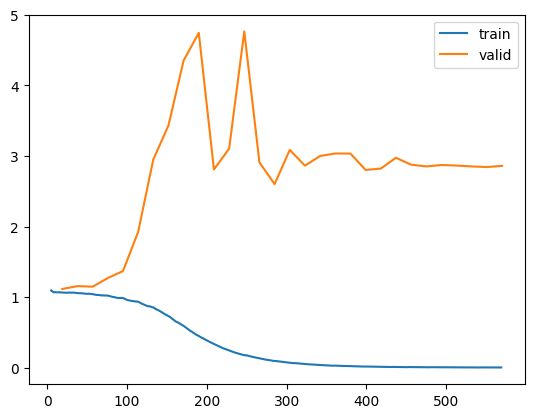

In [ ]:
learn2.unfreeze()
#learn2.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3))
learn2.fit_one_cycle(30, slice(2e-3,0.001737800776027143))

learn2.recorder.plot_loss()

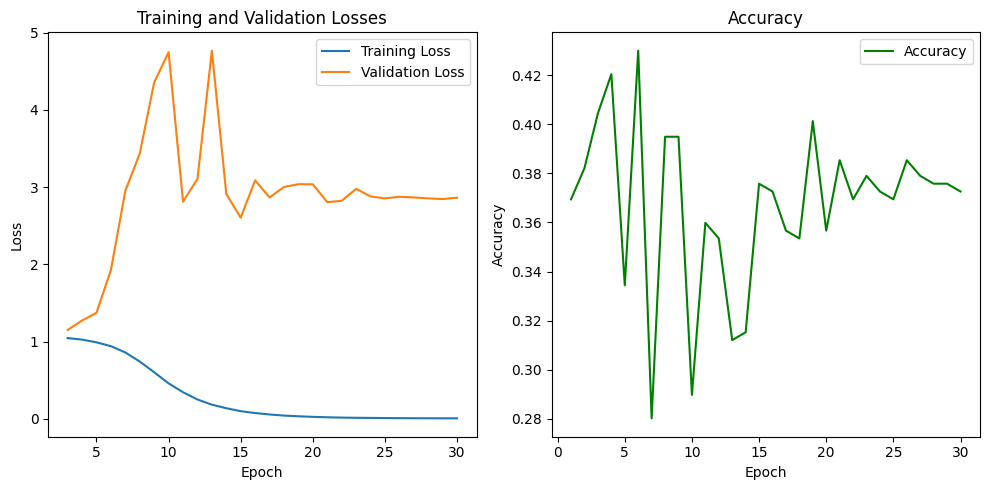

In [ ]:
#learn2.recorder.values

import matplotlib.pyplot as plt

# training loss, validation loss, and accuracy
train_losses = [value[0] for value in learn2.recorder.values]
val_losses = [value[1] for value in learn2.recorder.values]
accuracies = [value[2] for value in learn2.recorder.values]

# Plotting
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(epochs[2:], train_losses[2:], label='Training Loss')
plt.plot(epochs[2:], val_losses[2:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
learn2.save('Full_transcript_ulmfit_model')

Path('models/Full_transcript_ulmfit_model.pth')

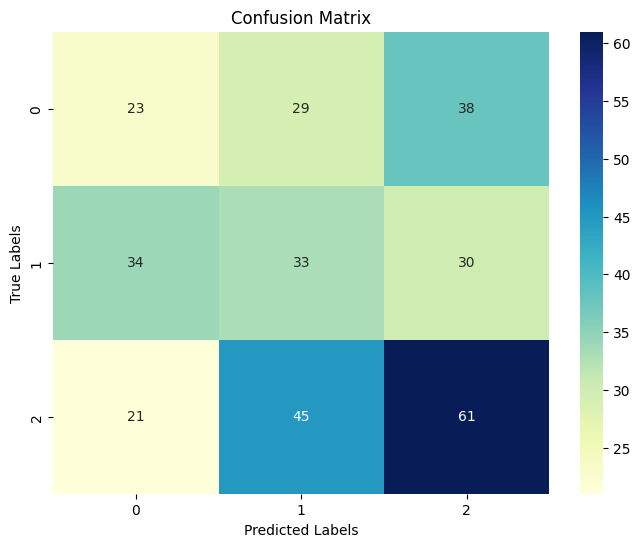

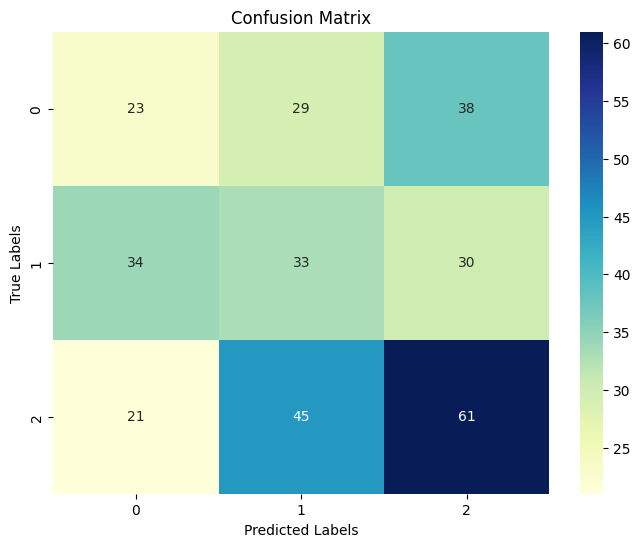

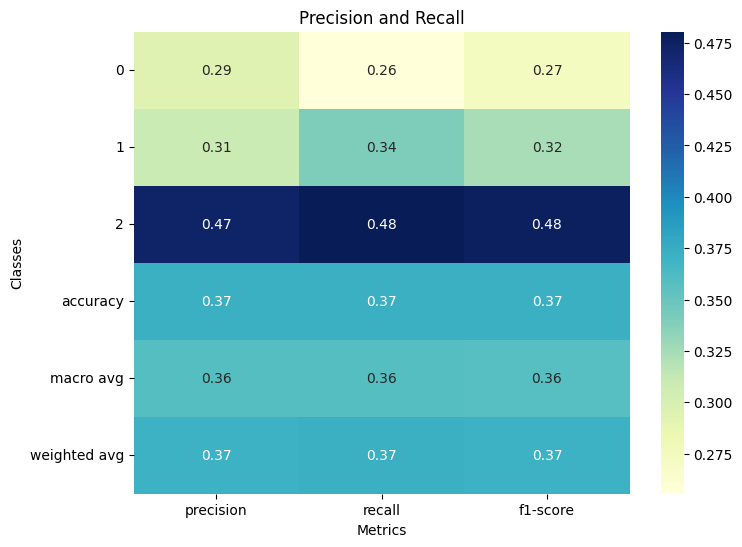

In [ ]:
preds, targets = learn2.get_preds()
predicted_labels = preds.argmax(dim=1)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



predicted_labels_list = predicted_labels.cpu().numpy().tolist()
true_labels_list = targets.cpu().numpy().tolist()

cm = confusion_matrix(true_labels_list, predicted_labels_list)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(true_labels_list, predicted_labels_list, digits=2, output_dict=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot precision and recall
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Precision and Recall")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


In [ ]:
learn2.summary()

SequentialRNN (Input shape: 64 x 21677)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 5 x 1152       
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 5 x 400        
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
BatchNorm1d                               2400       True      
Dropout                                                        
____________________________________________________________________________
                     64 x 50             
Linear                                    60000      True      
ReLU                                    

Model trained on Q/A Section

In [ ]:
df3 = pd.DataFrame({'label':filtered_df.price_change_category_3, 'text':filtered_df.parsed_text_identifier})

# Data Pre processing
df3['text'] = df3['text'].str.replace("[^a-zA-Z]", " ")
# removing stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# tokenization
tokenized_word = df3['text'].apply(lambda x: x.split())

# remove stop-words
tokenized_word = tokenized_word.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_tok = []
for i in range(len(df)):
    #print(i)
    #print(tokenized_doc[i])
    t = ' '.join(tokenized_word[i])
    detokenized_tok.append(t)

df3['text'] = detokenized_tok
## splitting data into train and validation datasets
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_train, df_val = train_test_split(df3, stratify = df3['label'], test_size = 0.2, random_state = 12)

df_train.shape, df_val.shape

from fastai.text import *
df_train['is_valid'] = 0
df_val['is_valid'] = 1
df_combine_q_a = pd.concat([df_train, df_val], axis=0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#dls.show_batch()

In [ ]:
#dls_lm.show_batch(show = True)
class_lm_q_a = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=156, is_lm=True), CategoryBlock),
    get_x=ColReader('text'), get_y=ColReader('label'),
    splitter=ColSplitter())

dls_q_a = class_lm_q_a.dataloaders(df_combine_q_a, bs=64)

learn_q_a = language_model_learner(
    dls_q_a, AWD_LSTM, drop_mult=0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

learn_q_a.fit_one_cycle(5, 2e-2)

learn_q_a.save('learn_q_a_5')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.997139,3.971728,0.363390,53.076145,03:20
1,3.837546,3.821062,0.375653,45.652660,03:21
2,3.660881,3.721870,0.384310,41.341618,03:21
3,3.552744,3.657041,0.391567,38.746525,03:21
4,3.485265,3.640922,0.393753,38.126976,03:21


RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	size mismatch for 0.encoder.weight: copying a param with shape torch.Size([28680, 400]) from checkpoint, the shape in current model is torch.Size([37592, 400]).
	size mismatch for 0.encoder_dp.emb.weight: copying a param with shape torch.Size([28680, 400]) from checkpoint, the shape in current model is torch.Size([37592, 400]).
	size mismatch for 1.decoder.weight: copying a param with shape torch.Size([28680, 400]) from checkpoint, the shape in current model is torch.Size([37592, 400]).
	size mismatch for 1.decoder.bias: copying a param with shape torch.Size([28680]) from checkpoint, the shape in current model is torch.Size([37592]).

In [ ]:
#learn_q_a = learn.load('learn_q_a_5')
learn_q_a.save_encoder('learn_q_a_enc_5')

c_q_a = DataBlock(
    blocks=(TextBlock.from_df(text_cols = 'text', seq_len=156, vocab=dls_q_a.vocab[0]), CategoryBlock),
    get_x=ColReader('text'), get_y=ColReader('label'),
    splitter=ColSplitter())

dls_class_q_a = c_q_a.dataloaders(df_combine_q_a, bs=64)
dls_class_q_a.show_batch(max_n=2)


model_q_a = text_classifier_learner(dls_class_q_a, AWD_LSTM, drop_mult=0.3,#moms=(0.8,0.7),
                                metrics=accuracy).to_fp16()

model_q_a = model_q_a.load_encoder('learn_q_a_enc_5')


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,text,category
0,"xxbos xxmaj operator xxmaj at time open floor questions . [ operator xxmaj instructions ] xxmaj okay . xxmaj our first question comes xxmaj robbie xxmaj marcus jpmorgan . xxmaj your line open , please go ahead . xxmaj robbie xxmaj marcus xxmaj great . xxmaj thanks congrats another fantastic quarter . xxmaj kevin , maybe start , i feel like bit xxunk © xxunk xxunk , sitting exactly time last year investors starting worry good year 2022 . xxmaj and good 2023 be , people wondering 2024 . xxmaj so i hoping could give little color behind 7.5 % 9 % organic sales growth . xxmaj how much transitory ? xxmaj how much durable pricing ? xxmaj and key drivers could point us to ? xxmaj thanks . xxmaj kevin xxmaj lobo xxmaj yes . xxmaj thanks , xxmaj robbie . xxmaj it certainly terrific year 2023 . xxmaj",1
1,"xxbos xxmaj operator xxmaj thank you . [ operator xxmaj instructions ] xxmaj and first question come xxmaj duane xxmaj pfennigwerth xxmaj evercore xxup isi . xxmaj please go ahead . xxmaj duane xxmaj pfennigwerth xxmaj hey . xxmaj thanks . xxmaj just costs , i totally appreciate business run thereâ€ ™ s moving pieces . xxmaj but slow drip xxup casm revisions painful investors . xxmaj and so , question is , feel like band - aid finally ripped today ? xxmaj and circumstances would cause raise xxup casm expectations year ? xxmaj bob xxmaj jordan xxmaj hey xxmaj duane . xxmaj yes . xxmaj iâ€ ™ ll start xxmaj tammy clean here . xxmaj but youâ€ ™ ve seen revisions . i mean , thereâ€ ™ s real inflation there . xxmaj some that . a lot continuing revise labor accruals market changes . xxmaj if take pilots",2


epoch,train_loss,valid_loss,accuracy,time
0,1.194818,1.100966,0.340764,00:20
1,1.181221,1.106887,0.388535,00:20
2,1.142321,1.131399,0.385350,00:20
3,1.114752,1.144036,0.375796,00:20
4,1.085379,1.126756,0.388535,00:20
5,1.060776,1.150692,0.401274,00:20
6,1.040236,1.148477,0.378981,00:20
7,1.015252,1.189396,0.372611,00:20
8,0.994463,1.162384,0.378981,00:20
9,0.968824,1.184223,0.369427,00:20


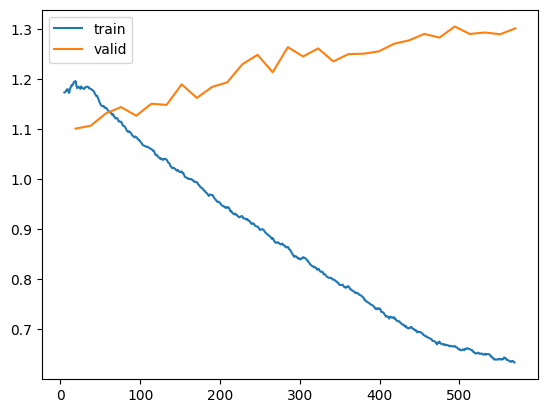

In [ ]:
model_q_a.fit_one_cycle(30, slice(2e-3,0.001737800776027143))

model_q_a.recorder.plot_loss()

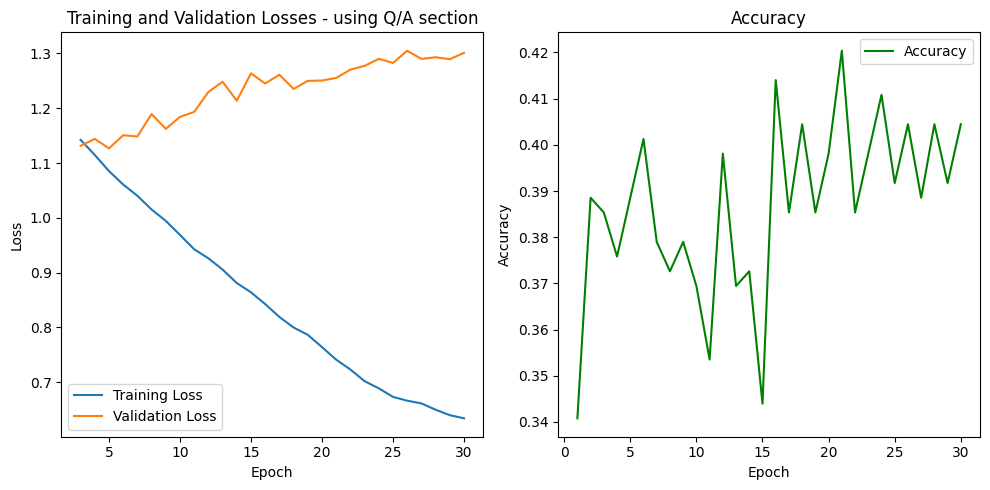

In [ ]:
#learn2.recorder.values

import matplotlib.pyplot as plt

# training loss, validation loss, and accuracy
train_losses_q_a = [value[0] for value in model_q_a.recorder.values]
val_losses_q_a = [value[1] for value in model_q_a.recorder.values]
accuracies_q_a = [value[2] for value in model_q_a.recorder.values]

# Plotting
epochs = range(1, len(train_losses_q_a) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(epochs[2:], train_losses_q_a[2:], label='Training Loss')
plt.plot(epochs[2:], val_losses_q_a[2:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses - using Q/A section')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies_q_a, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model_q_a.save('Q_A_transcript_ulmfit_model')

Path('models/Q_A_transcript_ulmfit_model.pth')

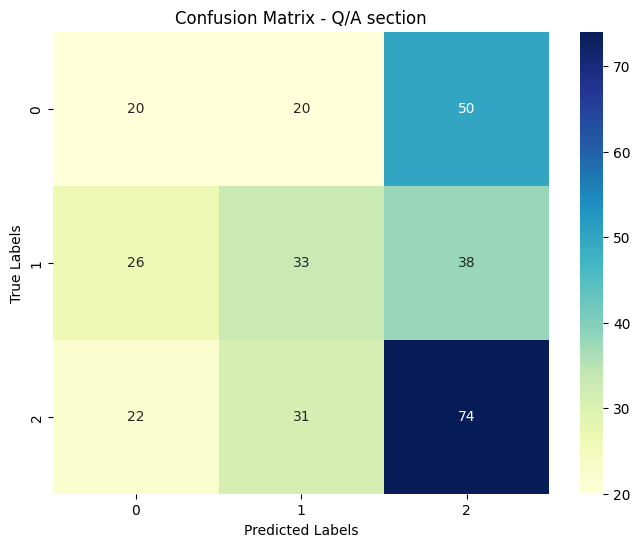

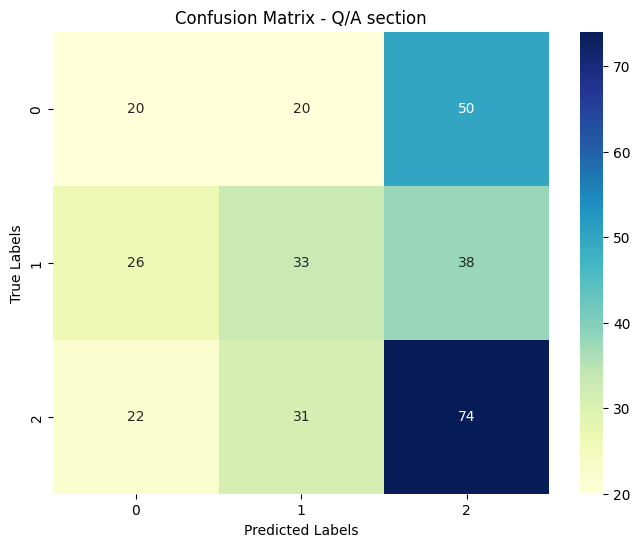

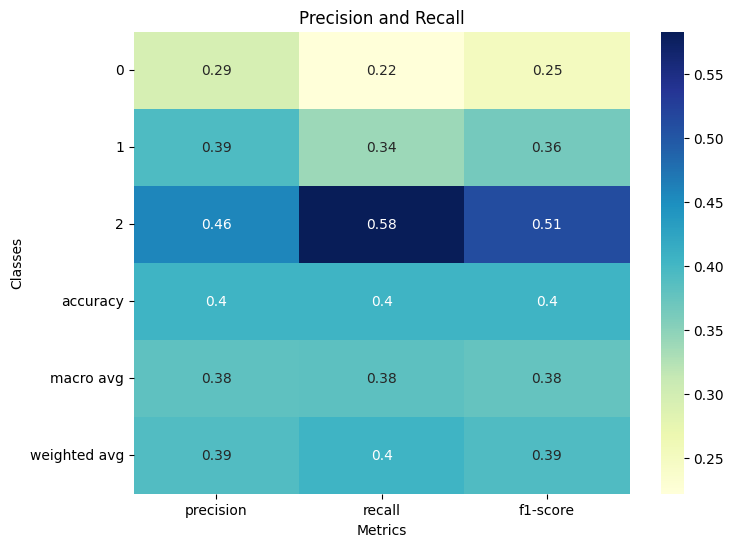

In [ ]:
preds, targets = model_q_a.get_preds()
predicted_labels = preds.argmax(dim=1)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



predicted_labels_list = predicted_labels.cpu().numpy().tolist()
true_labels_list = targets.cpu().numpy().tolist()

cm = confusion_matrix(true_labels_list, predicted_labels_list)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Q/A section")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(true_labels_list, predicted_labels_list, digits=2, output_dict=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Q/A section")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('confusion_matrix_q_a.png')
plt.show()


# Plot precision and recall
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Precision and Recall")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig('precision_recall.png')
plt.show()


**ULMFIT END**